In [1]:
import numpy as np

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer
from keras.layers.recurrent import SimpleRNN, LSTM
?InputLayer

Init signature: InputLayer(input_shape=None, batch_size=None, batch_input_shape=None, dtype=None, input_tensor=None, sparse=False, name=None)
Docstring:     
Layer to be used as an entry point into a graph.

It can either wrap an existing tensor (pass an `input_tensor` argument)
or create its a placeholder tensor (pass arguments `input_shape`
or `batch_input_shape` as well as `dtype`).

# Arguments
    input_shape: Shape tuple, not including the batch axis.
    batch_size: Optional input batch size (integer or None).
    batch_input_shape: Shape tuple, including the batch axis.
    dtype: Datatype of the input.
    input_tensor: Optional tensor to use as layer input
        instead of creating a placeholder.
    sparse: Boolean, whether the placeholder created
        is meant to be sparse.
    name: Name of the layer (string).
File:           ~/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/keras/engine/topology.py
Type:           type


In [60]:
model = Sequential()
#model.add(InputLayer((7,)))
model.add(SimpleRNN(4, input_shape=(7,)))
model.add(Dense(4, activation='sigmoid'))
#model.add(SimpleRNN(2, activation='sigmoid', return_sequences=False))
model.add(Dense(2, activation='sigmoid'))


#model = Sequential()
#model.add(LSTM(512, return_sequences=True, input_shape=(10,13)))
#model.add(LSTM(512))
#model.add(Dense(1201))

#model.add(Dense(units=2, activation='relu', input_dim=2))
#model.add(Dense(units=1, activation='softmax'))

#model.summary()
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)


ValueError: Input 0 is incompatible with layer simple_rnn_21: expected ndim=3, found ndim=2

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 16        
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


In [9]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 7)                 56        
_________________________________________________________________
activation_6 (Activation)    (None, 7)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 16        
_________________________________________________________________
activation_7 (Activation)    (None, 2)                 0         
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


In [285]:
w = model.get_weights()
#w[1][0] = 100
#w = w * 1000
for x in w:
    x *= 10
model.set_weights(w)

In [316]:
x = np.random.rand(1,7)
#x = np.zeros((1,7))
print(x)
model.predict(x)

[[0.58055279 0.30749767 0.99942634 0.35397292 0.18731543 0.67401662
  0.87118081]]


array([[0.00323691, 0.9987674 ]], dtype=float32)

In [22]:
(x@w[0] + w[1])@w[2] + w[3]

array([[0.08681252]])

In [8]:
def encode_weights(w):
    g = np.concatenate([x.flatten() for x in w])
    return g

def decode_weights(g, model):
    w_shape = [wi.shape for wi in model.get_weights()]
    w_size = [wi.size for wi in model.get_weights()]

    w = []
    tmp = g
    for shape, size in zip(w_shape, w_size):
        w.append(tmp[:size].reshape(shape))
        tmp = tmp[size:]
    return w
    


In [9]:
g = encode_weights(w)
w2 = decode_weights(g, model)

In [10]:
[np.all(x == y) for x,y in zip(w, w2)]

[True, True, True, True]

In [1]:
from keras import backend as K

/Users/maruyama/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

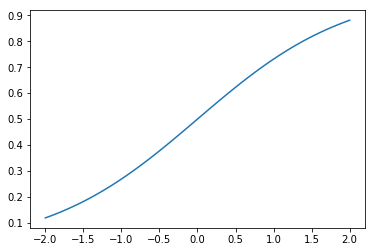

In [73]:
x = np.linspace(-2,2,100)
with tf.Session() as sess:
    y = K.sigmoid(x).eval()
plt.plot(x, y)
with tf.Session() as sess:
    y = K.tanh(x).eval()
#plt.plot(x, y)
plt.show()